In [33]:
import pandas as pd
import numpy as np
from math import floor

df = pd.read_csv("CSIRO_Recons_gmsl_yr_2019.csv", header=0, index_col=0, parse_dates=True, squeeze=True)
df["Time"] = [floor(x) for x in df["Time"]]
df.drop(columns=["GMSL uncertainty (mm)"], axis=1, inplace=True)
df.rename(columns={"Time": "year", "GMSL (mm)": "sea_level"}, inplace=True)

df["year"] = pd.to_datetime(df["year"], format="%Y")
df.head()

C:\Users\User\AppData\Local\Temp/ipykernel_21064/1849460381.py:5: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  df = pd.read_csv("CSIRO_Recons_gmsl_yr_2019.csv", header=0, index_col=0, parse_dates=True, squeeze=True)


KeyError: 'Time'

In [24]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df["sea_level"])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[0]}")

ADF Statistic: 2.393373897067616
p-value: 2.393373897067616


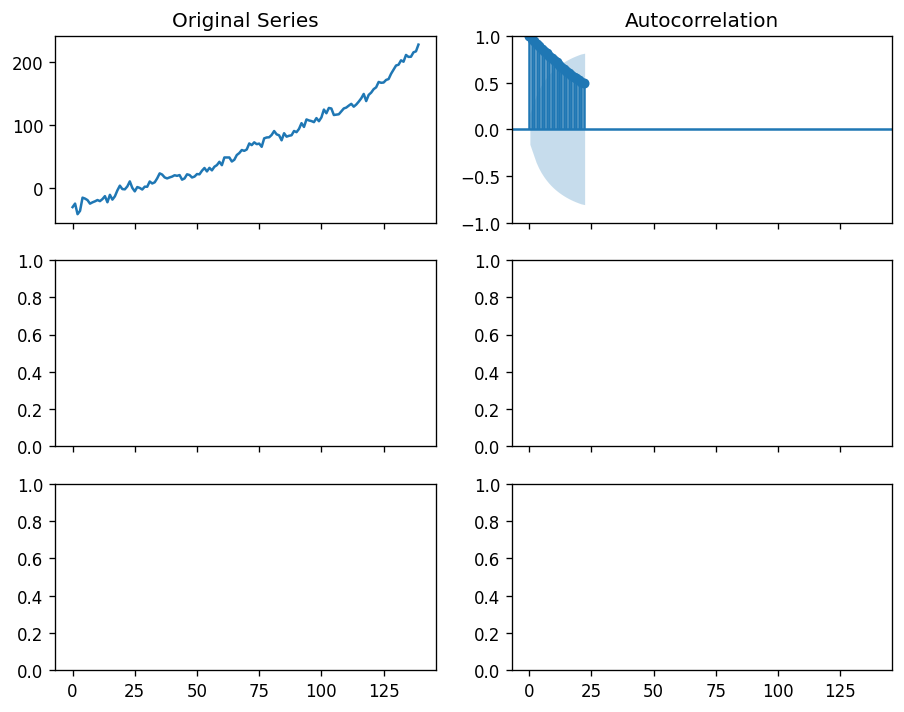

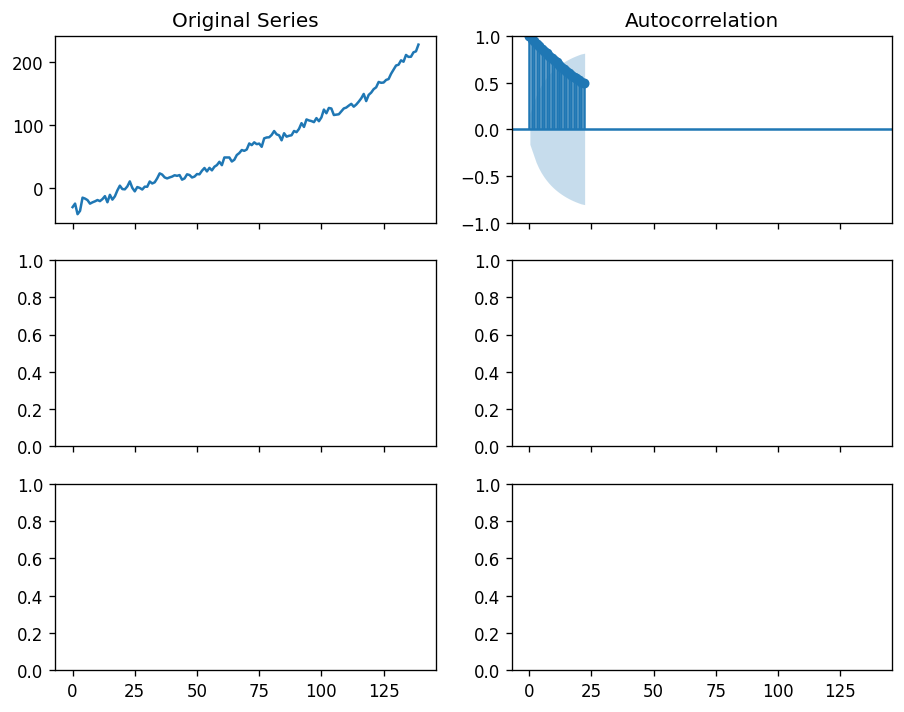

In [49]:
# grid search ARIMA parameters for time series
import warnings
from math import sqrt
from pandas import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
 
# evaluate an ARIMA model for a given order (p,d,q)
def evaluate_arima_model(X, arima_order):
    # prepare training dataset
    train_size = int(len(X) * 0.66)
    train, test = X[0:train_size], X[train_size:]
    history = [x for x in train]
    # make predictions
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(history, order=arima_order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])
    # calculate out of sample error
    rmse = sqrt(mean_squared_error(test, predictions))
    return rmse
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
    dataset = dataset.astype('float32')
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    rmse = evaluate_arima_model(dataset, order)
                    if rmse < best_score:
                        best_score, best_cfg = rmse, order
                    print('ARIMA%s RMSE=%.3f' % (order,rmse))
                except:
                    continue
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))
 
# load dataset
# evaluate parameters
p_values = [0, 1, 2, 4, 6, 8, 10]
d_values = range(0, 3)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(df.values, p_values, d_values, q_values)